# Prediction of Employee Attrition 

#### Dataset
The dataset is available at <strong>"data/attrition.csv"</strong> in the respective challenge's repo.<br>
This is a fictional data set created by IBM data scientists.

#### Features (X)
1. Age - Employee's current age. (Numeric)
2. BusinessTravel - Frequency of travelling for business (Categorical)
    - Travel Frequently
    - Travel Rarely
    - Not Travel at all
3. DailyRate - Daily rate of earning. (Numeric)
4. Department - Job-specific Department. (Categorical)
    - R&D
    - Sales
    - HR
5. DistanceFromHome (Numeric)
6. Education (Numeric) -
    - Below College (1)
    - College (2)
    - Bachelor (3)
    - Master (4)
    - Doctor (5)
7. Education Field (Categorical) -
    - Life Sciences
    - Medical
    - Marketing
    - Techincal Degree
    - Human Resources
    - Other
8. EmployeeCount (Numeric)
9. EmployeeNumber (Numeric)
10. EnvironmentSatisfaction (1-4) (Numeric)
11. Gender (Binary)
12. HourlyRate (Numeric)
13. JobInvolvement (1-4) (Numeric)
14. JobLevel (1-5) (Numeric)
15. JobRole (Categorical)
    - Research Scientist
    - Laboratory Technician
    - Manufacturing Director
    - Healthcare Representative
    - Manager
    - Research Director
    - Sales Executive
    - Sales Representative
    - Human Resources
16. JobSatisfaction (1-4) (Numeric)
17. MaritalStatus (Categorical)
    - Married
    - Single
    - Divorced
18. MonthlyIncome (Numeric)
19. MonthlyRate (Numeric)
20. NumCompaniesWorked (Numeric)
21. OverTime (Yes/No) (Categorical)
22. PercentSalaryHike (Numeric)
23. PerformanceRating (1-4) (Numeric)
24. RelationshipSatisfaction (1-4) (Numeric)
25. StandardHours (numeric)
26. StockOptionLevel (0-3) (Numeric)
27. TotalWorkingYears (Numeric)
28. TrainingTimesLastYear (0-5) (Numeric)
29. WorkLifeBalance (1-4)(Numeric)
30. YearsAtCompany (Numeric)
31. YearsInCurrentRole (Numeric)
32. YearsSinceLastPromotion(Numeric)
33. YearsWithCurrManager (Numeric)

#### Target (y)
- Attrition (Binary)

#### Objective
- To apply Logistic Regression and Decision Tree Algorithms on the given dataset and understand the concepts of Underfitting and Overfitting and ways to combat these problems. There are three sections -
- Section 1 
    - Visualization of Overfitting and Underfitting (with results on cross validation)
- Section 2
    - Regularization


#### Tasks
- Download and load the data (csv file)
- Process the data according to guidelines given in the comments of the respective cells.
- Split the dataset into 60% for training and rest 40% for testing (sklearn.model_selection.train_test_split function)
- Initialize Logistic Regression and Decision Tree Models (With parameters given in the cell)
- Train the models on the same dataset
- Complete Section 1 and 2

#### Further Fun (will not be evaluated)
- Train model on different train-test splits such as 60-40, 50-50, 70-30, 80-20, 90-10, 95-5 etc. and observe the respective plots and results on both X_train and X_test
- Shuffle training samples with different random seed values in the train_test_split function. Check the model error for the testing data for each setup.
- Explore ways to deal with imbalanced dataset. Use different methods (such as eliminating outliers and such) to experiment with the given dataset.

#### Helpful links
- pd.get_dummies() and One Hot Encoding: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- Feature Scaling: https://scikit-learn.org/stable/modules/preprocessing.html
- Train-test splitting: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Differences between Logistic Regression and a Decision Tree: https://www.geeksforgeeks.org/ml-logistic-regression-v-s-decision-tree-classification/
- When are Decision Trees better than Logistic Regression?: https://www.displayr.com/decision-trees-are-usually-better-than-logistic-regression
- How to choose between Logistic Regression and Decision Trees given a dataset: https://datascience.stackexchange.com/questions/6048/should-i-use-a-decision-tree-or-logistic-regression-for-classification
- Decision Tree Classifier by Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Regularization and Geometry- https://towardsdatascience.com/regularization-and-geometry-c69a2365de19
- RidgeClassifier- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import numpy as np
from learning_plot import plot_learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn import linear_model
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [4]:
# Git clone the repo 
!wget https://raw.githubusercontent.com/DeepConnectAI/challenge-week-6/master/data/attrition.csv

--2020-09-20 16:44:53--  https://raw.githubusercontent.com/DeepConnectAI/challenge-week-6/master/data/attrition.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194393 (190K) [text/plain]
Saving to: ‘attrition.csv’

attrition.csv       100%[===================>] 189.84K  --.-KB/s    in 0.04s   

2020-09-20 16:44:54 (4.31 MB/s) - ‘attrition.csv’ saved [194393/194393]



In [5]:
# Read the data from local cloud directory
data = pd.read_csv("attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
1,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
2,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2
3,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,80,0,8,2,2,7,7,3,6
4,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,80,1,17,3,3,5,2,0,3
1266,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,80,1,9,5,3,7,7,1,7
1267,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1268,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,80,0,17,3,2,9,6,0,8


In [6]:
# Print shape of the dataframe
data.shape

(1270, 34)

In [7]:
# Print info about dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1270 non-null   int64 
 1   Attrition                 1270 non-null   object
 2   BusinessTravel            1270 non-null   object
 3   DailyRate                 1270 non-null   int64 
 4   Department                1270 non-null   object
 5   DistanceFromHome          1270 non-null   int64 
 6   Education                 1270 non-null   int64 
 7   EducationField            1270 non-null   object
 8   EmployeeCount             1270 non-null   int64 
 9   EmployeeNumber            1270 non-null   int64 
 10  EnvironmentSatisfaction   1270 non-null   int64 
 11  Gender                    1270 non-null   object
 12  HourlyRate                1270 non-null   int64 
 13  JobInvolvement            1270 non-null   int64 
 14  JobLevel                

In [8]:
# Fill Missing Values (if any)
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [9]:
# One Hot Encode Categorical Columns (if required)
data.loc[(data.Attrition == "No"),'Attrition']='0'
data.loc[(data.OverTime == "No"),'OverTime']='0'
data.loc[(data.Attrition == "Yes"),'Attrition']='1'
data.loc[(data.OverTime == "Yes"),'OverTime']='1'
dataBusinessTravel = pd.get_dummies(data.BusinessTravel, prefix='BusinessTravel')
dataDepartment = pd.get_dummies(data.Department, prefix='Department')
dataEducationField = pd.get_dummies(data.EducationField, prefix='EducationField')
dataGender = pd.get_dummies(data.Gender, prefix='Gender')
dataJobRole = pd.get_dummies(data.JobRole, prefix='JobRole')
dataMaritalStatus = pd.get_dummies(data.MaritalStatus, prefix='MaritalStatus')
data = pd.concat([data, dataBusinessTravel, dataDepartment, dataEducationField, dataGender, dataJobRole, dataMaritalStatus], axis=1)
data.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


In [10]:
data = data.drop(data.columns[[2,4,7,11,15,17]], axis = 1)

In [11]:
data = data.replace(to_replace = ['Yes','No'],value = ['1','0'])

In [12]:
# Normalize/Standardize numerical columns
names = data.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [13]:
#Define X and y
X=data.drop(['Attrition'],axis=1)
y=data['Attrition']

In [14]:
# Split the data (60/40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Section 1

In this section, we will be introducing you to a practical visualization of the concepts of Overfitting and Underfitting alongside Cross Validation as a metric to measure performance of your dataset

### Overfitting

Let's take a look at the accuracies we get when the models overfit (LR and DT)

In [15]:
#Defining the models 
lr=LogisticRegression(class_weight='balanced',penalty='none',fit_intercept=False)
dt=DecisionTreeClassifier()

In [17]:
#Fit the models
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=None, solver='lbfgs',
                   tol=0.0001, verbose=0, warm_start=False)

In [18]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
#Print the accuracies of the training and test splits for both models
train_pred_lr = lr.predict(X_train)
train_pred_dt = dt.predict(X_train)
test_pred_lr = lr.predict(X_test)
test_pred_dt = dt.predict(X_test)

In [20]:
print("----------LOGISTIC REGRESSION----------")
print("Accuracy of Training Split :",accuracy_score(y_train,train_pred_lr))
print("Accuracy of Test Split :",accuracy_score(y_test,test_pred_lr))
print()
print("----------DECISION TREE----------")
print("Accuracy of Training Split :",accuracy_score(y_train,train_pred_dt))
print("Accuracy of Test Split :",accuracy_score(y_test,test_pred_dt))

----------LOGISTIC REGRESSION----------
Accuracy of Training Split : 0.8359580052493438
Accuracy of Test Split : 0.8464566929133859

----------DECISION TREE----------
Accuracy of Training Split : 1.0
Accuracy of Test Split : 0.9488188976377953


As we could see above, even though both models perform very well on the training set, they fail to show the same promise for the testing result. Now let's visualize our findings.

<strong>Note</strong> - For cross validation, one can also use KFolds or StratifiedKFolds

We are splitting the original X into 10 train/test splits and
reinitializing our models and thereby applying them onto the splits for evaluation

In [21]:
#Cross Validation splitting for evaluation of Logistic Regression
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

We then feed in X, y and the splits into our plot_learning_curve function which is user-defined and already imported

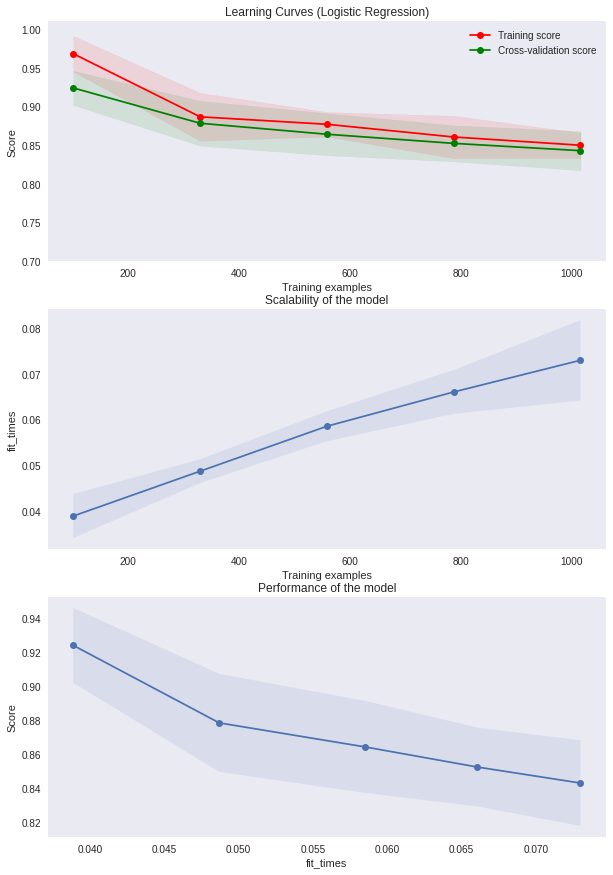

In [24]:
#Model Estimator
estimator = LogisticRegression(class_weight='balanced',penalty='none')

#Plot of Learning Curve (over original X and then cross val)
plt.style.use("seaborn")
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
title = "Learning Curves (Logistic Regression)"
plot_learning_curve(estimator, title, X, y, axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=2)

We do the same for Decision Tree

In [25]:
#Cross Validation splitting for evaluation of Decision Tree
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [26]:
#Model Estimator
estimator = DecisionTreeClassifier()

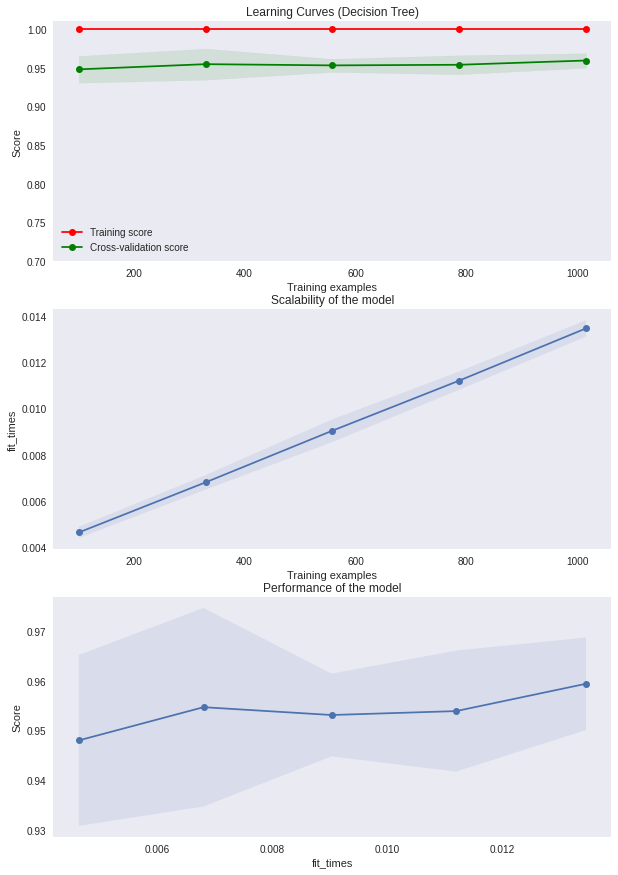

In [27]:
#Plot of Learning Curve (over original X and then cross val)
title = r"Learning Curves (Decision Tree)"
plt.style.use("seaborn")
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
plot_learning_curve(estimator, title, X, y, axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=2)

### Underfitting

Let's take a look at the accuracies we get when the models underfit (LR and DT)

In [28]:
#Define the models
lr=LogisticRegression(fit_intercept=False,class_weight='balanced',C=0.001)
dt=DecisionTreeClassifier(max_leaf_nodes=2,max_features='log2',class_weight='balanced')

In [32]:
#Fit the models
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
#Print the accuracies of the training and test splits for both models
train_pred_lr = lr.predict(X_train)
train_pred_dt = dt.predict(X_train)
test_pred_lr = lr.predict(X_test)
test_pred_dt = dt.predict(X_test)

In [34]:
print("----------LOGISTIC REGRESSION----------")
print("Accuracy of Training Split :",accuracy_score(y_train,train_pred_lr))
print("Accuracy of Test Split :",accuracy_score(y_test,test_pred_lr))
print()
print("----------DECISION TREE----------")
print("Accuracy of Training Split :",accuracy_score(y_train,train_pred_dt))
print("Accuracy of Test Split :",accuracy_score(y_test,test_pred_dt))

----------LOGISTIC REGRESSION----------
Accuracy of Training Split : 0.8438320209973753
Accuracy of Test Split : 0.8523622047244095

----------DECISION TREE----------
Accuracy of Training Split : 0.4225721784776903
Accuracy of Test Split : 0.40551181102362205


As we could see above, both models perform poorly as far as training is concerned. As a result, we also perform poorly on the testing set. This happened because of the hyperparameters set in a specific way. Now, let's visualize this

In [35]:
#Cross Validation splitting for evaluation of Logistic Regression
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

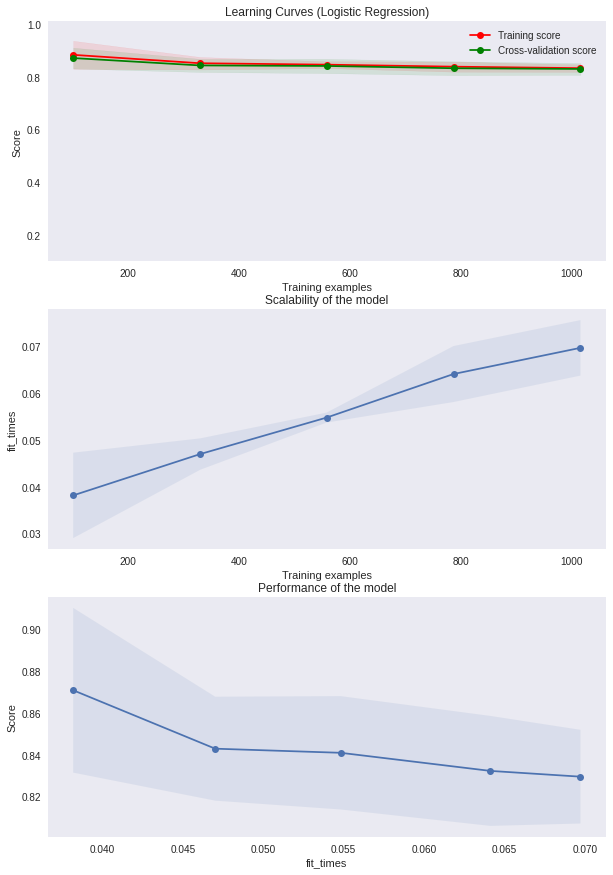

In [36]:
#Model Estimator
estimator = LogisticRegression(fit_intercept=False,class_weight='balanced',C=0.001)

#Plot of Learning Curve (over original X and then cross val)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
title = "Learning Curves (Logistic Regression)"
plot_learning_curve(estimator, title, X, y, axes=axes, ylim=(0.1, 1.01),
                    cv=cv, n_jobs=2)

Decision Tree

In [37]:
#Cross Validation splitting for evaluation of Decision Tree
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

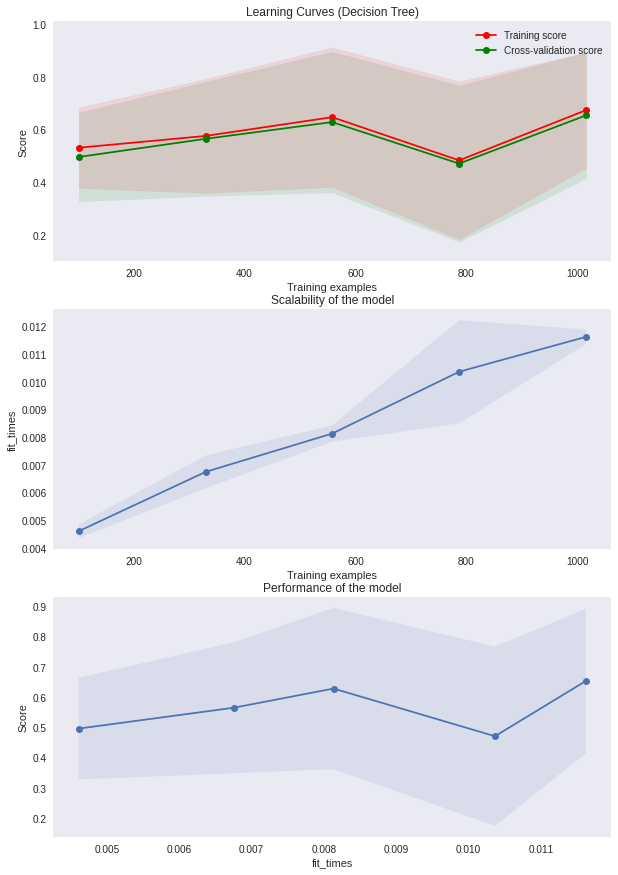

In [38]:
#Model Estimator
estimator = DecisionTreeClassifier(max_leaf_nodes=2,max_features='log2',class_weight='balanced')

#Plot of Learning Curve (over original X and then cross val)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
title = "Learning Curves (Decision Tree)"
plot_learning_curve(estimator, title, X, y, axes=axes, ylim=(0.1, 1.01),
                    cv=cv, n_jobs=2)

# Section 2

### L2 Regularization

In [39]:
#alpha: Regularization Strength, Larger values specify stronger regularization
alphas = np.logspace(10, -3, 1000)

In [42]:
#Training Ridge CLassifier on different values of alpha
ridge_coefs = []
train_losses=[]
test_losses=[]
for a in alphas:
    ridge = RidgeClassifier(alpha = a, fit_intercept = True, normalize = True)
    ridge.fit(X,y)
    train_losses.append(log_loss(y_train, ridge._predict_proba_lr(X_train)))
    test_losses.append(log_loss(y_test, ridge._predict_proba_lr(X_test)))
    ridge_coefs.append(ridge.coef_)

In [43]:
# Make ridge_coefs numpy array of shape (no_of_alphas,no_of_features)
ridge_coefs= np.array(ridge_coefs)
ridge_coefs = ridge_coefs.reshape((1000,53))

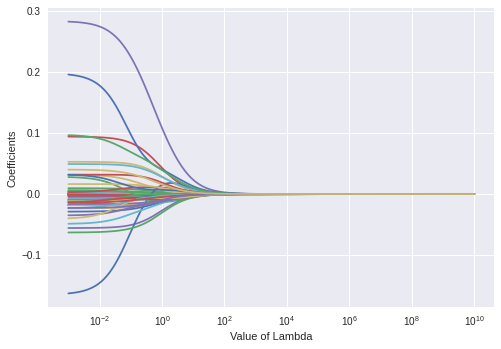

In [44]:
# Plot showing how coefficients vary with value of alpha
plt.style.use("seaborn")
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
plt.xlabel('Value of Lambda')
plt.ylabel('Coefficients')
plt.axis('tight')
plt.show()

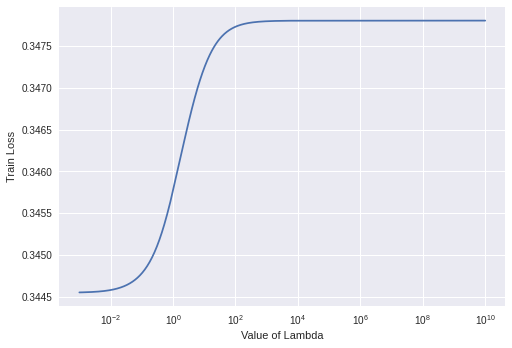

In [45]:
#Plot for Train Loss v/s Values of alpha
plt.style.use("seaborn")
ax = plt.gca()
plt.plot(alphas, train_losses)
ax.set_xscale('log')
plt.xlabel('Value of Lambda')
plt.ylabel('Train Loss')
plt.show()


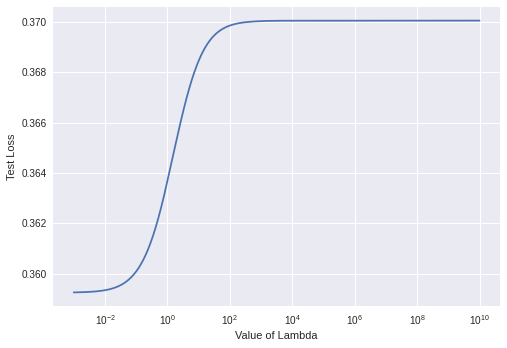

In [46]:
#Plot for Test Loss v/s Values of alpha
plt.style.use("seaborn")
ax = plt.gca()
plt.plot(alphas, test_losses)
ax.set_xscale('log')
plt.xlabel('Value of Lambda')
plt.ylabel('Test Loss')
plt.show()

### L1 Regularization

In [47]:
#c : Inverse of regularization strength; smaller values specify stronger regularization.
C= np.logspace(-10,3,1000)

In [48]:
# Training logisitic Regression with l1 penalty for different values of C
lasso_coefs = []
train_losses=[]
test_losses=[]
for c in C:
    lr = LogisticRegression(penalty='l1', C=c, fit_intercept=True, solver='liblinear')
    lr.fit(X,y)
    train_losses.append(log_loss(y_train, lr.predict_proba(X_train)))
    test_losses.append(log_loss(y_test,lr.predict_proba(X_test)))
    lasso_coefs.append(lr.coef_)

In [49]:
#Make lasso_coefs numpy array of shape (no_of_C,no_of_features)
lasso_coefs = np.array(lasso_coefs)
lasso_coefs = lasso_coefs.reshape((1000,53))

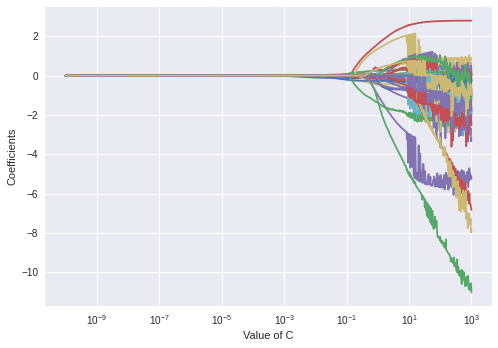

In [50]:
#Plot showing how coefficients vary with value of c
plt.style.use("seaborn")
ax = plt.gca()
ax.plot(C, lasso_coefs)
ax.set_xscale('log')
plt.xlabel('Value of C')
plt.ylabel('Coefficients')
plt.axis('tight')
plt.show()

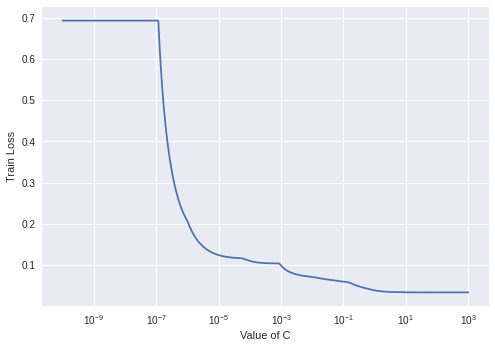

In [51]:
#Plot for Train Loss v/s Values of C
plt.style.use("seaborn")
ax = plt.gca()
plt.plot(C, train_losses)
ax.set_xscale('log')
plt.xlabel('Value of C')
plt.ylabel('Train Loss')
plt.show()

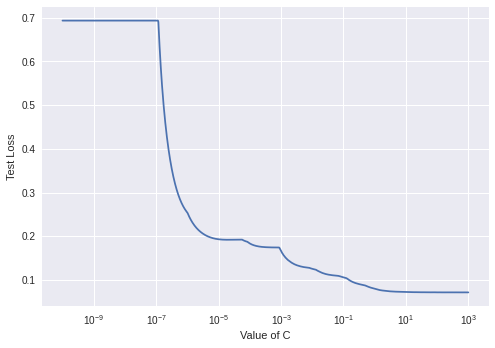

In [52]:
#Plot for Train Loss v/s Values of C
plt.style.use("seaborn")
ax = plt.gca()
plt.plot(C, test_losses)
ax.set_xscale('log')
plt.xlabel('Value of C')
plt.ylabel('Test Loss')
plt.show()